In [1]:
import tensorflow
import tensorflow.keras as ks
#載入資料、準備資料
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



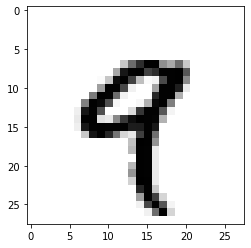

In [2]:
#顯示第 4 個數字的圖像
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [3]:
#試試看基本的類神經網路

# 舊版是這樣
#from keras import models
#from keras import layers
#from keras.datasets import mnist
#from keras.utils import to_categorical

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#- 加入padding參數，這個就是我們之前說的，四周圍沒有值的部份(超出的範圍)要怎麼處理

In [5]:

# 建立一個小型的cnn
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add( layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)) )
model.add( layers.MaxPooling2D((2, 2)) )

model.add( layers.Conv2D(64, (3, 3), activation='relu', padding='same') )
model.add( layers.MaxPooling2D((2, 2)) )

model.add( layers.Conv2D(64, (3, 3), activation='relu', padding='same') )

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [7]:
# 再加入Dense密集層，這邊需要先展平

model.add( layers.Flatten() )
model.add( layers.Dense(64, activation='relu') )
model.add( layers.Dense(10, activation='softmax') )


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)             

In [9]:
#- 備資料
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#- 整理資料
train_images = train_images.reshape((60000, 28, 28, 1))  #reshape 是 NumPy 陣列的 method
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#- 準備標籤
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
# compile 並訓練

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 59s 61ms/step - loss: 0.8389 - accuracy: 0.6636
Epoch 2/5
938/938 [==============================] - 55s 58ms/step - loss: 0.1242 - accuracy: 0.9789
Epoch 3/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0625 - accuracy: 0.9865
Epoch 4/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0442 - accuracy: 0.9903
Epoch 5/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0360 - accuracy: 0.9914


In [11]:
# 再使用測試資料進行評估
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0406 - accuracy: 0.9903


In [14]:
#加入Dropout
#- 備資料
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#- 整理資料
train_images = train_images.reshape((60000, 28, 28, 1))  #reshape 是 NumPy 陣列的 method
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#- 準備標籤
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
# 建立一個小型的cnn
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add( layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)) )
model.add( layers.MaxPooling2D((2, 2)) )

model.add( layers.Conv2D(64, (3, 3), activation='relu', padding='same') )
model.add( layers.MaxPooling2D((2, 2)) )

model.add( layers.Conv2D(64, (3, 3), activation='relu', padding='same') )

In [17]:
# 再加入Dense密集層，這邊需要先展平

model.add( layers.Flatten() )
model.add( layers.Dense(64, activation='relu') )
model.add( layers.Dropout(0.5) )
model.add( layers.Dense(10, activation='softmax') )


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

In [18]:
# compile 並訓練

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 53s 55ms/step - loss: 1.0656 - accuracy: 0.6055
Epoch 2/5
938/938 [==============================] - 52s 55ms/step - loss: 0.3517 - accuracy: 0.8934
Epoch 3/5
938/938 [==============================] - 51s 54ms/step - loss: 0.1820 - accuracy: 0.9636
Epoch 4/5
938/938 [==============================] - 52s 55ms/step - loss: 0.1399 - accuracy: 0.9729
Epoch 5/5
938/938 [==============================] - 52s 56ms/step - loss: 0.1241 - accuracy: 0.9760


In [19]:
# 再使用測試資料進行評估
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0664 - accuracy: 0.9844
